<a href="https://colab.research.google.com/github/palberth/Mineria-de-Datos-MASDI/blob/main/Burndownchart_Proyecto_Final_Alkanalitycs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# === Función para generar burndown de un sprint ===
def generar_sprint(fecha_inicio, fecha_fin, esfuerzo_inicial, nombre_sprint):
    # Generar todas las fechas del rango
    todas_las_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')

    # Excluir sábados (5) y domingos (6)
    fechas_habiles = [f for f in todas_las_fechas if f.weekday() not in [5, 6]]
    num_dias_habiles = len(fechas_habiles)

    # Esfuerzo ideal
    esfuerzo_ideal = np.linspace(esfuerzo_inicial, 0, num_dias_habiles)

    # Simulación esfuerzo real con variaciones aleatorias pequeñas
    np.random.seed(42)  # para reproducibilidad
    variaciones = np.random.randint(-2, 2, size=num_dias_habiles)
    esfuerzo_real = [max(0, esfuerzo_ideal[i] + variaciones[i]) for i in range(num_dias_habiles)]

    # Crear DataFrame
    df = pd.DataFrame({'Fecha': todas_las_fechas})
    df['Día'] = range(len(df))
    df['Esfuerzo Ideal'] = df['Fecha'].apply(lambda f: esfuerzo_ideal[fechas_habiles.index(f)] if f in fechas_habiles else np.nan)
    df['Esfuerzo Real'] = df['Fecha'].apply(lambda f: esfuerzo_real[fechas_habiles.index(f)] if f in fechas_habiles else np.nan)
    df['Sprint'] = nombre_sprint
    return df

# === Parámetros de los 4 sprints ===
sprints = []
parametros = [
    ("Sprint 1", datetime(2025, 3, 3), datetime(2025, 3, 12), 45),
    ("Sprint 2", datetime(2025, 3, 17), datetime(2025, 3, 26), 38),
    ("Sprint 3", datetime(2025, 3, 31), datetime(2025, 4, 9), 42),
    ("Sprint 4", datetime(2025, 4, 14), datetime(2025, 4, 23), 40),
]

# Generar los datos
for nombre, inicio, fin, esfuerzo in parametros:
    df_sprint = generar_sprint(inicio, fin, esfuerzo, nombre)
    sprints.append(df_sprint)

# Unir todos los sprints
df_completo = pd.concat(sprints, ignore_index=True)

# === Guardar a archivo Excel ===
df_completo.to_excel("burndown_sprints_alkanalitycs.xlsx", index=False)

# === Mostrar resumen ===
print("Archivo 'burndown_sprints_alkanalitycs.xlsx' generado exitosamente.")
df_completo.head()


Archivo 'burndown_sprints_alkanalitycs.xlsx' generado exitosamente.


,Fecha,Día,Esfuerzo Ideal,Esfuerzo Real,Sprint
0,2025-03-03,0,45.000000,45.000000,Sprint 1
1,2025-03-04,1,38.571429,39.571429,Sprint 1
2,2025-03-05,2,32.142857,30.142857,Sprint 1
3,2025-03-06,3,25.714286,25.714286,Sprint 1
4,2025-03-07,4,19.285714,19.285714,Sprint 1


       Fecha  Día  Esfuerzo Pendiente  Esfuerzo Real
0 2025-03-10    0           32.000000           32.0
1 2025-03-11    1           28.444444           32.0
2 2025-03-12    2           24.888889           32.0
3 2025-03-13    3           21.333333           24.0
4 2025-03-14    4           17.777778           16.0
5 2025-03-17    5           14.222222           16.0
6 2025-03-18    6           10.666667           16.0
7 2025-03-19    7            7.111111            8.0
8 2025-03-20    8            3.555556            0.0
9 2025-03-21    9            0.000000            0.0


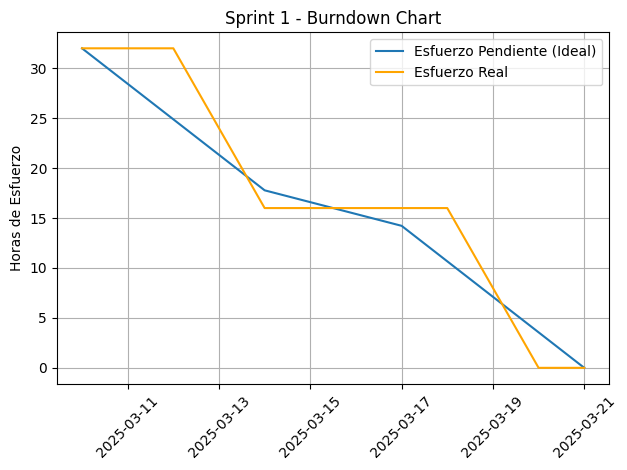

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday
from pandas.tseries.offsets import CustomBusinessDay
import matplotlib.pyplot as plt

# === 1. Días festivos en Colombia (solo algunos para ejemplo) ===
class ColombiaHolidays2025(AbstractHolidayCalendar):
    rules = [
        Holiday('Año Nuevo', month=1, day=1, observance=nearest_workday),
        Holiday('Reyes Magos', month=1, day=6, observance=nearest_workday),
        Holiday('Día del Trabajo', month=5, day=1, observance=nearest_workday),
        Holiday('Independencia', month=7, day=20, observance=nearest_workday),
        Holiday('Boyacá', month=8, day=7, observance=nearest_workday),
        Holiday('Raza', month=10, day=14, observance=nearest_workday),
        Holiday('Santos', month=11, day=4, observance=nearest_workday),
        Holiday('Cartagena', month=11, day=11, observance=nearest_workday),
        Holiday('Navidad', month=12, day=25, observance=nearest_workday),
    ]

# === 2. Crear calendario hábil ===
col_bday = CustomBusinessDay(calendar=ColombiaHolidays2025())

# === 3. Generar burndown simulado ===
def generar_burndown(nombre_sprint, fecha_inicio, esfuerzo_total=32):
    fechas = pd.date_range(start=fecha_inicio, periods=10, freq=col_bday)
    esfuerzo_pendiente = np.linspace(esfuerzo_total, 0, len(fechas))

    esfuerzo_real = []
    valor = esfuerzo_total
    for i in range(len(fechas)):
        if i in [0, 1, 2]:
            esfuerzo_real.append(valor)
        elif i in [3, 4]:
            valor -= esfuerzo_total * 0.25
            esfuerzo_real.append(valor)
        elif i in [5, 6]:
            esfuerzo_real.append(valor)
        elif i in [7, 8]:
            valor -= esfuerzo_total * 0.25
            esfuerzo_real.append(valor)
        else:
            esfuerzo_real.append(0)

    df = pd.DataFrame({
        "Fecha": fechas,
        "Día": range(len(fechas)),
        "Esfuerzo Pendiente": esfuerzo_pendiente,
        "Esfuerzo Real": esfuerzo_real
    })
    return df

# === 4. Generar y visualizar datos por sprint ===
base_fecha = datetime(2025, 3, 10)
sprints = {}
for i in range(4):
    nombre = f"Sprint {i+1}"
    fecha = base_fecha + timedelta(weeks=2 * i)
    sprints[nombre] = generar_burndown(nombre, fecha)

# === 5. Mostrar tabla y gráfico del Sprint 1 como en tu imagen ===
df_s1 = sprints["Sprint 1"]
print(df_s1)

plt.plot(df_s1["Fecha"], df_s1["Esfuerzo Pendiente"], label="Esfuerzo Pendiente (Ideal)")
plt.plot(df_s1["Fecha"], df_s1["Esfuerzo Real"], label="Esfuerzo Real", color='orange')
plt.xticks(rotation=45)
plt.title("Sprint 1 - Burndown Chart")
plt.ylabel("Horas de Esfuerzo")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()